# Lectura 7: Agrupamiento
## Aplicaciones de Minería de Datos I
### Abril, 2023

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Cargar el conjunto de datos
dataset = pd.read_csv('../datasets/dataset_malwares.csv',sep=',')
dataset = dataset.drop(columns=['Name'])

In [11]:
dataset.head()

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0    23117     144     3       0          4           0       65535     0   
1    23117     144     3       0          4           0       65535     0   
2    23117     144     3       0          4           0       65535     0   
3    23117     144     3       0          4           0       65535     0   
4    23117     144     3       0          4           0       65535     0   

   e_sp  e_csum  ...  SectionMaxChar  SectionMainChar  DirectoryEntryImport  \
0   184       0  ...      3758096608                0                     7   
1   184       0  ...      3791650880                0                    16   
2   184       0  ...      3221225536                0                     6   
3   184       0  ...      3224371328                0                     8   
4   184       0  ...      3227516992                0                     2   

   DirectoryEntryImportSize  DirectoryEntryExport  ImageDirectoryEntryExport  \
0                       152                     0                          0   
1                       311                     0                          0   
2                       176                     0                          0   
3                       155                     0                          0   
4                        43                     0                          0   

   ImageDirectoryEntryImport  ImageDirectoryEntryResource  \
0                      54440                        77824   
1                     262276                       294912   
2                      36864                        40960   
3                     356352                      1003520   
4                      61440                        73728   

   ImageDirectoryEntryException  ImageDirectoryEntrySecurity  
0                         73728                            0  
1                             0                       346112  
2                             0                            0  
3                             0                     14109472  
4                             0                        90624  

[5 rows x 78 columns]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


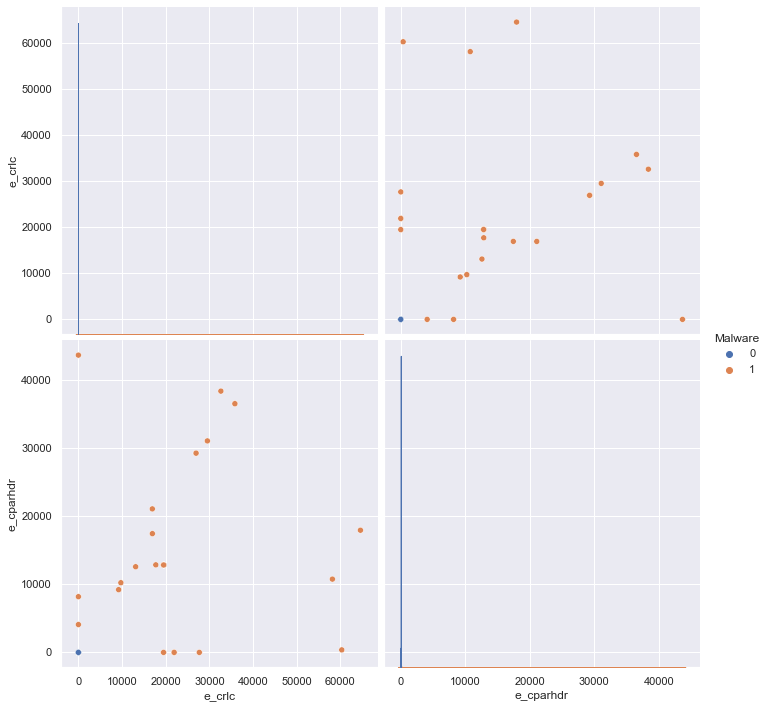

In [4]:
#Genrar un conjunto de todos los datos
sns.set()
#Seleccionar columnas
columnas = ['e_crlc','e_cparhdr','Malware']
# Agrupar
sns.pairplot(dataset[columnas],size=5,hue='Malware')

## Algoritmo K-means

In [5]:
#Algoritmo de agrupamiento
from sklearn.cluster import KMeans
#Biblioteca matplotlib de gráficos
from matplotlib import pyplot as plt

In [6]:
#Conjunto de muestras no etiquetadas
X = dataset.drop(columns=['Malware'])

In [15]:
#Entrenamiento del algoritmo
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
#Agrupar las muestras
grupos = kmeans.fit_predict(X)
#centroides
centroides = kmeans.cluster_centers_

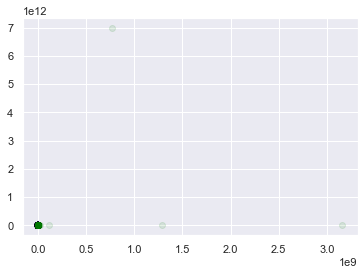

In [18]:
#gráfico de dispersión
plt.scatter(X['DirectoryEntryImportSize'][:50],X['DirectoryEntryImport'][:50],c=grupos[0:50])
#plt.scatter(X['SectionMaxPointerData'],X['SectionMaxPointerData'],c=grupos)
plt.scatter(centroides[0],centroides[1],c='green',alpha=0.1)
plt.show()

# Dataset de muestra

In [20]:
#sklearn.datasets contiene muchos conjuntos de datos de prueba
#make_blobs genera un conjunto de datos de n dimensiones sin etiquetas||
from sklearn.datasets import make_blobs

In [23]:
#genera 300 muestras y 3 posibles grupos
X,y = make_blobs(n_samples=300,centers=3)

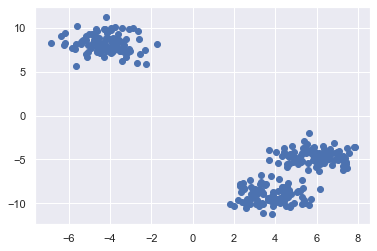

In [24]:
plt.scatter(X[:,0],X[:,1])

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
grupos = kmeans.fit_predict(X)

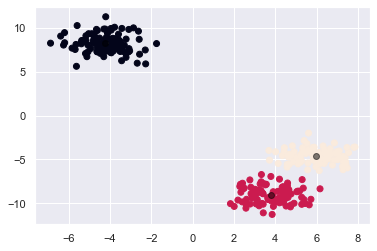

In [26]:
plt.scatter(X[:,0],X[:,1],c=grupos)
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0],centroides[:,1],c='black',alpha=0.5)

## Agrupamiento Jarárquico

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
X,y = make_blobs(n_samples=20,centers=2)
enlace_sencillo = linkage(X,'single')

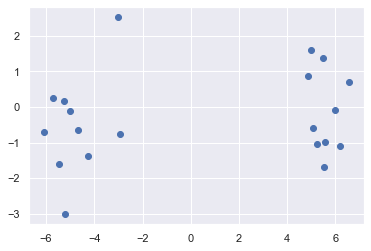

In [30]:
plt.scatter(X[:,0],X[:,1])

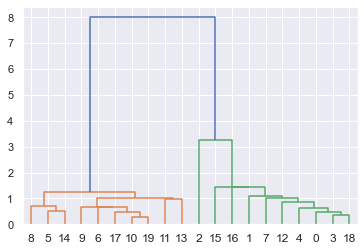

In [31]:
dendrogram(enlace_sencillo)
plt.show()

## Fuzzy C-means

In [33]:
#%pip install fuzzy-c-means

In [34]:
from fcmeans import FCM

In [40]:
fcm = FCM(n_clusters=3)
fcm.fit(X)
centros = fcm.centers
grupos = fcm.predict(X)

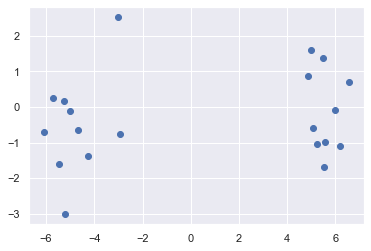

In [41]:
plt.scatter(X[:,0],X[:,1])

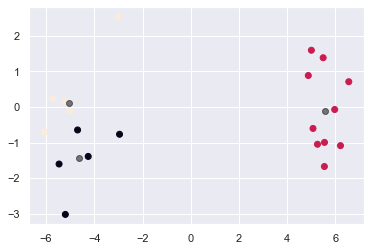

In [42]:
plt.scatter(X[:,0],X[:,1],c=grupos)
plt.scatter(centros[:,0],centros[:,1],c='black',alpha=0.5)

In [43]:
grupos

array([2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1])

#### Ejercicio

<p>Con el conjunto de datos de cryptojacking <code>dataset_MR_V5_ID_optimized</code> Aplique los algoritmos de agrupación K-Means, Jarquico y Fuzzy C-Means, mostrando la lista de centroides y gráficas de agrupamiento, para solo dos grupos.</p>
</p> No olivar elimiar la columna <code>Hora</code> y <code>Label</code></p>

In [63]:
X = pd.read_csv('../datasets/dataset_MR_V5_ID.csv')

In [64]:
X.head()

Hora         C1   C2   C3  \
0  05/21/2019 17:20:22.015  92.153928  0.0  0.0   
1  05/21/2019 17:21:07.011  93.336042  0.0  0.0   
2  05/21/2019 17:21:52.002  98.695494  0.0  0.0   
3  05/21/2019 17:22:37.002  97.723444  0.0  0.0   
4  05/21/2019 17:23:22.021  98.710094  0.0  0.0   

   Proceso(chrome)\Operaciones de ES de datos/s  \
0                                     32.709430   
1                                     15.070699   
2                                      0.866827   
3                                      0.044444   
4                                      0.000000   

   Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
0                         1.211241e+05                         40.0   
1                         3.100975e+06                         32.0   
2                         8.539578e+02                         29.0   
3                         1.653326e+01                         27.0   
4                         0.000000e+00                         27.0   

   Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
0                                   0.496719               6.088173   
1                                   8.299424              19.871984   
2                                   0.000000               4.378587   
3                                   0.000000               1.088884   
4                                   0.000000               2.243506   

   Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
0             1.325547        549.250711       13018.949981   
1             0.155597         34.498119          32.586497   
2             0.000000         20.559356          26.093712   
3             0.000000         40.710932          24.666558   
4             0.000000         50.467775          24.656351   

   Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
0             4.197994             10.542667               1.024380   
1             0.489020              0.444563               0.288966   
2             0.333395              0.355621               0.022226   
3             0.444442              0.333332               0.022222   
4             0.510897              0.333194               0.000000   

   Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
0                 0.006446          3111.005099                 21.375443   
1                 0.000000          6081.471589                 21.131621   
2                 0.000000           262.270699                 21.060478   
3                 0.000000           725.996801                 20.978489   
4                 0.000000           260.424379                 20.942650   

   utilidad del procesador  Label  
0                 7.849272      0  
1                 6.652355      0  
2                 1.304476      0  
3                 2.276608      0  
4                 1.290458      0

In [65]:
len(X.columns)

20

In [67]:
X = X.drop(columns=["Hora","Label"])

In [68]:
X.head()

C1   C2   C3  Proceso(chrome)\Operaciones de ES de datos/s  \
0  92.153928  0.0  0.0                                     32.709430   
1  93.336042  0.0  0.0                                     15.070699   
2  98.695494  0.0  0.0                                      0.866827   
3  97.723444  0.0  0.0                                      0.044444   
4  98.710094  0.0  0.0                                      0.000000   

   Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
0                         1.211241e+05                         40.0   
1                         3.100975e+06                         32.0   
2                         8.539578e+02                         29.0   
3                         1.653326e+01                         27.0   
4                         0.000000e+00                         27.0   

   Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
0                                   0.496719               6.088173   
1                                   8.299424              19.871984   
2                                   0.000000               4.378587   
3                                   0.000000               1.088884   
4                                   0.000000               2.243506   

   Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
0             1.325547        549.250711       13018.949981   
1             0.155597         34.498119          32.586497   
2             0.000000         20.559356          26.093712   
3             0.000000         40.710932          24.666558   
4             0.000000         50.467775          24.656351   

   Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
0             4.197994             10.542667               1.024380   
1             0.489020              0.444563               0.288966   
2             0.333395              0.355621               0.022226   
3             0.444442              0.333332               0.022222   
4             0.510897              0.333194               0.000000   

   Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
0                 0.006446          3111.005099                 21.375443   
1                 0.000000          6081.471589                 21.131621   
2                 0.000000           262.270699                 21.060478   
3                 0.000000           725.996801                 20.978489   
4                 0.000000           260.424379                 20.942650   

   utilidad del procesador  
0                 7.849272  
1                 6.652355  
2                 1.304476  
3                 2.276608  
4                 1.290458

In [57]:
###k means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X.values)
grupos = kmeans.fit_predict(X.values)

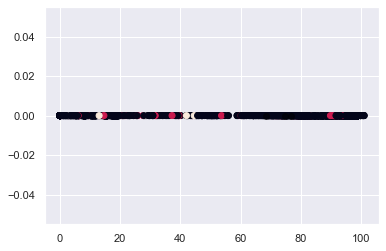

In [56]:
plt.scatter(X.values[:,0],X.values[:,1],c=grupos)
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0],centroides[:,1],c='black',alpha=0.5)

In [69]:
# agrupamiento jerárquico
#enlace_sencillo = linkage(X,'single')
#dendrogram(enlace_sencillo)
#plt.show()

In [72]:
#Fuzzy C-means
fcm = FCM(n_clusters=3)
fcm.fit(X.values)
centros = fcm.centers
grupos = fcm.predict(X.values)

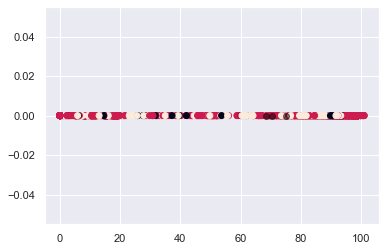

In [77]:
plt.scatter(X.values[:,0],X.values[:,1],c=grupos)
plt.scatter(centros[:,0],centros[:,1],c='black',alpha=0.5)

In [78]:
X.describe()

C1       C2       C3  \
count  12726.000000  12726.0  12726.0   
mean      68.520095      0.0      0.0   
std       39.805131      0.0      0.0   
min        0.000000      0.0      0.0   
25%       18.258118      0.0      0.0   
50%       90.874992      0.0      0.0   
75%       97.692296      0.0      0.0   
max      100.983866      0.0      0.0   

       Proceso(chrome)\Operaciones de ES de datos/s  \
count                                  12726.000000   
mean                                      36.136787   
std                                       72.262645   
min                                        0.000000   
25%                                        1.733756   
50%                                       12.089963   
75%                                       35.681971   
max                                     1795.316255   

       Proceso(chrome)\Bytes de datos ES/s  Proceso(chrome) subprocesos  \
count                         1.272600e+04                 12726.000000   
mean                          1.113026e+05                    29.820304   
std                           4.794091e+05                     5.677206   
min                           0.000000e+00                     1.000000   
25%                           8.324397e+02                    27.000000   
50%                           5.072812e+03                    28.000000   
75%                           3.979343e+04                    30.000000   
max                           4.677280e+06                    51.000000   

       Proceso(chrome)\% de tiempo de procesador  Escrituras en disco/s  \
count                               12726.000000           12726.000000   
mean                                    0.488521               5.336215   
std                                     1.551592              18.076221   
min                                     0.000000               0.044437   
25%                                     0.000000               0.755798   
50%                                     0.034734               1.711436   
75%                                     0.451386               5.909197   
max                                    25.246148            1064.819285   

       Lecturas de disco/s  Bytes enviados/s  Bytes recibidos/s  \
count         12726.000000      12726.000000       1.272600e+04   
mean              0.980885        538.143963       1.539497e+04   
std              13.805087       1766.385389       8.079211e+04   
min               0.000000          1.194623       1.553716e+00   
25%               0.000000         33.395188       2.729592e+01   
50%               0.000000         66.874590       8.624177e+01   
75%               0.022229        218.106900       5.477529e+02   
max             831.503948      98097.784301       4.812144e+06   

       Paquetes enviados/s  Paquetes recibidos/s  Lecturas de paginas/s  \
count         12726.000000          12726.000000           12726.000000   
mean              4.546930             11.846439               0.992680   
std              18.603816             54.947218              12.073777   
min               0.022123              0.022123               0.000000   
25%               0.399965              0.332985               0.000000   
50%               0.710868              0.622357               0.022222   
75%               1.536102              1.711050               0.088888   
max            1118.878021           3183.701036             475.031124   

       Escrituras de paginas/s  Errores de pagina/s  bytes confirmados en uso  \
count             12726.000000         12726.000000              12726.000000   
mean                  0.004320          2760.235827                 28.455869   
std                   0.086336          4905.270569                  3.963335   
min                   0.000000            16.143987                 18.057942   
25%                   0.000000           353.279120                 25.264804   
50%                   0.000000   